## Import

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score, confusion_matrix, RocCurveDisplay, roc_curve, roc_auc_score, precision_recall_fscore_support, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, normalize


## Parsing the Data

In [2]:
print('hello there')

data_src = "./eqmag_copy.csv"
df = pd.read_csv(data_src, skiprows=[])
df.columns = ['Sl. No.', 'YEAR', 'MONTH ', 'DATE', 'ORIGIN TIME', 'IST',
       'MAGNITUDE', 'mw', 'mb', 'mbb', 'ms',
       'ml', 'LAT', 'LONG', 'DEPTH', 'INTENSITY',
       'mmi', 'mme', 'LOCATION', 'REFERENCE']
df = df.drop(labels=0, axis=0)
df = df.drop(labels=['IST', 'mw', 'mb', 'mbb', 'ms',
       'ml', 'INTENSITY', 'mmi', 'mme', 'ORIGIN TIME'], axis=1)
df

hello there


/home/vivek/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,6,7,9,10,11,12,13,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sl. No.,YEAR,MONTH,DATE,MAGNITUDE,LAT,LONG,DEPTH,LOCATION,REFERENCE
1,1.0,-2474.0,0,0.0,7.5,71.0,24.0,0.0,NaN,Dr STGR
2,2.0,-325.0,0,0.0,7.5,71.0,24.0,0.0,NaN,Dr STGR
3,3.0,25.0,0,0.0,7.5,72.9,33.72,0.0,NaN,Dr STGR
4,4.0,26.0,5,10.0,6.1397,17.3,80.1,NaN,NaN,NEIC
5,5.0,26.0,5,10.0,6.1397,26.0,97.0,80.0,Myanmar,G-R
...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,7.0,28.0,3.2,32.8�N,78.4�E,10.0,Jammu & Kashmir,NaN
52986,52971.0,2019.0,7.0,28.0,3.6,25.5�N,90.4�E,70.0,"Distt. East Garo Hills ,Meghalaya",NaN
52987,52972.0,2019.0,7.0,28.0,4.0,23.2�N,86.5�E,22.0,"Distt. Puruliya, West Bengal",NaN
52988,52973.0,2019.0,7.0,29.0,4.3,32.8�N,76.4�E,20.0,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


In [3]:
df[df['LOCATION'].notna()]

,Sl. No.,YEAR,MONTH,DATE,MAGNITUDE,LAT,LONG,DEPTH,LOCATION,REFERENCE
5,5.0,26.0,5,10.0,6.1397,26.0,97.0,80.0,Myanmar,G-R
768,753.0,1897.0,6,12.0,8.1,26.0,91.0,60.0,"Assam,India",OLD
863,848.0,1906.0,8,31.0,6.6393,27.0,97.0,100.0,India - Myanmar Border,G-R/BDA
888,873.0,1908.0,12,12.0,6.95155,26.5,97.5,NaN,Myanmar,G-R/T-S
900,885.0,1909.0,2,17.0,5.3903,27.0,87.0,NaN,Nepal,T-S
...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,7.0,28.0,3.2,32.8�N,78.4�E,10.0,Jammu & Kashmir,NaN
52986,52971.0,2019.0,7.0,28.0,3.6,25.5�N,90.4�E,70.0,"Distt. East Garo Hills ,Meghalaya",NaN
52987,52972.0,2019.0,7.0,28.0,4.0,23.2�N,86.5�E,22.0,"Distt. Puruliya, West Bengal",NaN
52988,52973.0,2019.0,7.0,29.0,4.3,32.8�N,76.4�E,20.0,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


## Cleaning the Data

In [4]:
n = df.shape[0]
k = 3
dfpart = df[:][['YEAR', 'MAGNITUDE', 'LAT', 'LONG', 'DEPTH']]
dfpart = dfpart[dfpart.DEPTH == dfpart.DEPTH]
# dfpart = dfpart[isinstance(dfpart.LAT, float)]
dfpart
# dfpart = dfpart[['YEAR', 'MAGNITUDE', 'LAT', 'LONG', 'DEPTH']]
# km = KMeans(n_clusters=k, random_state=0).fit(dfpart) 

,YEAR,MAGNITUDE,LAT,LONG,DEPTH
1,-2474.0,7.5,71.0,24.0,0.0
2,-325.0,7.5,71.0,24.0,0.0
3,25.0,7.5,72.9,33.72,0.0
5,26.0,6.1397,26.0,97.0,80.0
6,50.0,7,69.5,37.1,0.0
...,...,...,...,...,...
52985,2019.0,3.2,32.8�N,78.4�E,10.0
52986,2019.0,3.6,25.5�N,90.4�E,70.0
52987,2019.0,4.0,23.2�N,86.5�E,22.0
52988,2019.0,4.3,32.8�N,76.4�E,20.0


In [16]:
# #Unused function

# def correct_coord(x):
#     print(x[:-2])
#     return float(x[:-2])

# for i,r in tqdm(dfpart.iterrows()):
#     try: 
#         dfpart.loc[i, 'LAT'] = float(r.LAT)
#     except:
#         print(i, r.LAT, end=" ")
#         try:
#             dfpart.loc[i, 'LAT'] = correct_coord(r.LAT)
#         except:
#             dfpart.loc[i, 'LAT'] = 6.2

# dfpart

In [5]:
def correc(x):
    try: 
        return float(x)
    except:
        # print(x, end=" ")
        try:
            return float(x[:-2])
        except:
            return 6.2

In [6]:
def correc_long(x):
    try: 
        return float(x)
    except:
        # print(x, end=" ")
        try:
            return float(x[:-2])
        except:
            return 70.2

In [7]:
for col in dfpart.columns:
    dfpart = dfpart[dfpart[col].notna()]
dfpart['LAT'] = dfpart['LAT'].apply(correc)
dfpart['LONG'] = dfpart['LONG'].apply(correc_long)
dfpart = dfpart.reset_index(drop=True)
dfpart['YEAR'] = dfpart['YEAR'].astype(int)
dfpart['MAGNITUDE'] = dfpart['MAGNITUDE'].astype(float)
dfpart['DEPTH'] = dfpart['DEPTH'].astype(float)
dfpart

,YEAR,MAGNITUDE,LAT,LONG,DEPTH
0,-2474,7.5000,71.0,24.00,0.0
1,-325,7.5000,71.0,24.00,0.0
2,25,7.5000,72.9,33.72,0.0
3,26,6.1397,26.0,97.00,80.0
4,50,7.0000,69.5,37.10,0.0
...,...,...,...,...,...
40102,2019,3.2000,32.8,78.40,10.0
40103,2019,3.6000,25.5,90.40,70.0
40104,2019,4.0000,23.2,86.50,22.0
40105,2019,4.3000,32.8,76.40,20.0


In [8]:
#checking if any NaN values
for col in dfpart:
    print('*********\n', col, '\n', dfpart[dfpart[col] != dfpart[col]], '\n************\n')

*********
 YEAR 
 Empty DataFrame
Columns: [YEAR, MAGNITUDE, LAT, LONG, DEPTH]
Index: [] 
************

*********
 MAGNITUDE 
 Empty DataFrame
Columns: [YEAR, MAGNITUDE, LAT, LONG, DEPTH]
Index: [] 
************

*********
 LAT 
 Empty DataFrame
Columns: [YEAR, MAGNITUDE, LAT, LONG, DEPTH]
Index: [] 
************

*********
 LONG 
 Empty DataFrame
Columns: [YEAR, MAGNITUDE, LAT, LONG, DEPTH]
Index: [] 
************

*********
 DEPTH 
 Empty DataFrame
Columns: [YEAR, MAGNITUDE, LAT, LONG, DEPTH]
Index: [] 
************



# Adjusting threshold $T$ 

In [140]:
T = 4
df_knn = dfpart#.drop('YEAR', axis=1)
df_knn['target_labels'] = [int(j) for j in [float(i) >= T for i in df_knn['MAGNITUDE']]]
df_knn

train, test = train_test_split(df_knn, test_size=0.2)

y_train = train['target_labels'].to_numpy()
y_test = test['target_labels'].to_numpy()
X_train = train.drop(['MAGNITUDE', 'target_labels'], axis=1).to_numpy()
X_test = test.drop(['MAGNITUDE', 'target_labels'], axis=1).to_numpy()

## Splitting in train/test sets

In [269]:
train, test = train_test_split(df_knn, test_size=0.2)

In [270]:
y_train = train['target_labels'].to_numpy()
y_test = test['target_labels'].to_numpy()
X_train = train.drop(['MAGNITUDE', 'target_labels'], axis=1).to_numpy()
X_test = test.drop(['MAGNITUDE', 'target_labels'], axis=1).to_numpy()
# train,X_train,y_train,test, X_test,y_test

# KNN

In [11]:
scores = {}

 12%|█▎        | 1/8 [00:00<00:03,  2.20it/s]

3 0.9169783096484667 0.9549695740365112


 25%|██▌       | 2/8 [00:00<00:02,  2.27it/s]

5 0.9209673398155074 0.9572661094634672


 38%|███▊      | 3/8 [00:01<00:02,  2.19it/s]

10 0.9227125405135876 0.9580797836375929


 50%|█████     | 4/8 [00:01<00:01,  2.07it/s]

20 0.9237097980553478 0.958776774888859


 62%|██████▎   | 5/8 [00:02<00:01,  1.96it/s]

30 0.9245823984043879 0.9593768884710939


 75%|███████▌  | 6/8 [00:03<00:01,  1.86it/s]

40 0.9239591124407879 0.9590658971950073


 88%|████████▊ | 7/8 [00:03<00:00,  1.70it/s]

50 0.9225878833208676 0.9583305374756761


100%|██████████| 8/8 [00:04<00:00,  1.79it/s]

60 0.9237097980553478 0.9589977220956719


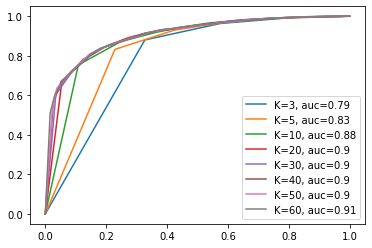

In [139]:
K = [3,5,10,20,30,40,50,60]
fpr = []
tpr = []
plt.figure(0).clf()

for k in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    y_pred_proba = neigh.predict_proba(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    # tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    # fpr.append(fp/(fp+tn))
    # tpr.append(tp/(tp+fn))
    print(k, scores[k], f1_score(y_test, y_pred))
    # RocCurveDisplay.from_predictions(y_test, y_pred)

    fpr, tpr, thresh = roc_curve(y_test, [x[1] for x in y_pred_proba])
    auc = roc_auc_score(y_test, [x[1] for x in y_pred_proba])
    plt.plot(fpr,tpr,label="K="+str(k)+", auc="+str(round(auc,2)))

plt.legend(loc=0)


### The optimal $K$ seems to be $10$ with Accuracy $=87.3\%$, F-score $=0.711$ and AUC $=0.80$ and $T=5$

### The optimal $K$ seems to be $30$ with Accuracy $=92.2\%$, F-score $=0.96$ and AUC $=0.91$ and $T=4$


<!-- ### Optimal $K$ seems to be $30$ with accuracy $62.3\%$ and AUC $=0.62$ at $T=4.5$ -->

### $T=4$: Accuracy vs K Plot

Text(0, 0.5, 'Accuracy')

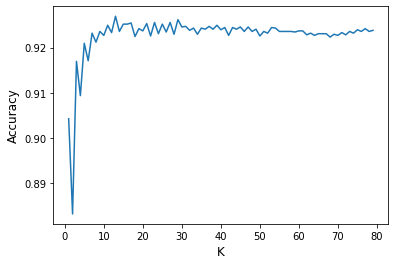

In [138]:
keys = list(scores.keys())
vals = [float(scores[k]) for k in keys]
# print(vals)
knn_plot = sns.lineplot(x=keys, y=vals)
knn_plot.set_xlabel('K', fontsize=12)
knn_plot.set_ylabel('Accuracy', fontsize=12)

# Decision Trees

 29%|██▊       | 2/7 [00:00<00:00, 15.32it/s]

2 0.9138618798304662 0.9549925096072429
7 0.924956369982548 0.9594776521270866
20 0.9075043630017452 0.9493998908892525


 57%|█████▋    | 4/7 [00:00<00:00, 11.32it/s]

30 0.9021441037147844 0.9462954094547446
39 0.9006482174021441 0.945466985973315


100%|██████████| 7/7 [00:00<00:00, 10.53it/s]

36 0.8997756170531039 0.944991789819376
35 0.9006482174021441 0.9454819071071893


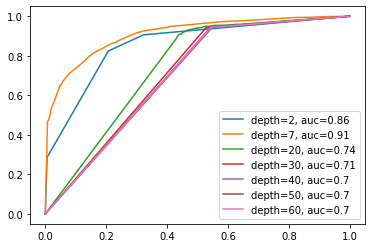

In [136]:
deps = []
accu = []
targ = [2,7,20,30,40,50,60]
plt.figure(0).clf()
for dep in tqdm(targ):#[2,7,20,30,40,50,60]
    dtc = DecisionTreeClassifier(max_depth=dep)
    dtc = dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_test)
    y_pred_proba = dtc.predict_proba(X_test)
    deps.append(dtc.get_depth())
    accu.append(accuracy_score(y_test, y_pred_dtc))
    # RocCurveDisplay.from_predictions(y_test, y_pred_dtc)
    print(dtc.get_depth(), accuracy_score(y_test, y_pred_dtc), f1_score(y_test, y_pred_dtc))

    fpr, tpr, thresh = roc_curve(y_test, [x[1] for x in y_pred_proba])
    auc = roc_auc_score(y_test, [x[1] for x in y_pred_proba])
    plt.plot(fpr,tpr,label="depth="+str(dep)+", auc="+str(round(auc,2)))

plt.legend(loc=0)


In [16]:
export_graphviz( dtc,
out_file="tree.dot", feature_names=['Year', 'Lat', 'Long', 'Depth'], class_names=["0","1"], rounded=True,
            filled=True
        )

### Optimal depth seems to be $7$ with Accuracy $=87.5\%$, F-score $=0.693$ and AUC $=0.78$ at $T=5$

### Optimal depth seems to be $7$ with Accuracy $=92.3\%$, F-score $=0.96$ and AUC $=0.91$ at $T=4$

<!-- ### Optimal depth seems to be $20$ with Accuracy $=72.8\%$ and AUC $=0.59$ at $T=4.2$ -->

## Decision Tree: Accuracy vs Depth Plot for $T=4$

Text(0, 0.5, 'Accuracy')

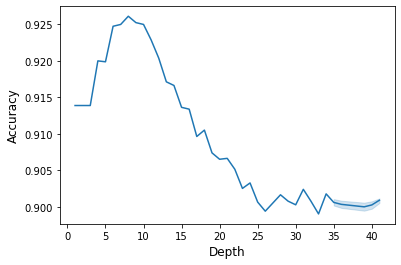

In [133]:
dtc_plot = sns.lineplot(x=deps,y=accu)
dtc_plot.set_xlabel('Depth', fontsize=12)
dtc_plot.set_ylabel('Accuracy', fontsize=12)

# Ensemble Learning

 14%|█▍        | 1/7 [00:00<00:00,  6.98it/s]

2 0.8858140114684617 0.9360067067206931


 29%|██▊       | 2/7 [00:00<00:01,  4.54it/s]

7 0.9237097980553478 0.958743427261696


 43%|████▎     | 3/7 [00:01<00:01,  2.07it/s]

20 0.9227125405135876 0.9581307401404647


 57%|█████▋    | 4/7 [00:02<00:02,  1.32it/s]

30 0.9257043131388681 0.9597677872282976


 71%|███████▏  | 5/7 [00:03<00:02,  1.06s/it]

40 0.9254549987534281 0.959676331759946


 86%|████████▌ | 6/7 [00:06<00:01,  1.44s/it]

50 0.9280727998005485 0.9611212182467489


100%|██████████| 7/7 [00:08<00:00,  1.24s/it]

60 0.9268262278733483 0.9604367459729055


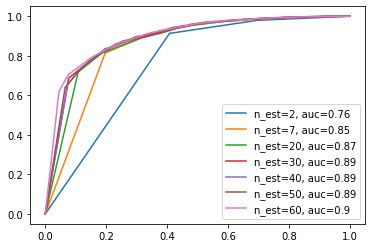

In [134]:
ests = [2,7,20,30,40,50,60]
estimators = []
rnd_accu = []
plt.figure(0).clf()
for est in tqdm(ests):#[2,7,20,30,40,50,60]
    rnd = RandomForestClassifier(n_estimators=est)
    rnd = rnd.fit(X_train, y_train)
    y_pred_rnd = rnd.predict(X_test)
    y_pred_proba = rnd.predict_proba(X_test)
    # deps.append(dtc.get_depth())
    estimators.append(est)
    rnd_accu.append(accuracy_score(y_test, y_pred_rnd))
    # RocCurveDisplay.from_predictions(y_test, y_pred_rnd)
    print(est, accuracy_score(y_test, y_pred_rnd), f1_score(y_test, y_pred_rnd))

    fpr, tpr, thresh = roc_curve(y_test, [x[1] for x in y_pred_proba])
    auc = roc_auc_score(y_test, [x[1] for x in y_pred_proba])
    plt.plot(fpr,tpr,label="n_est="+str(est)+", auc="+str(round(auc,2)))

plt.legend(loc=0)

<!-- ### The optimal number of estimators seems to be $40$ with Accuracy $=75.3\%$, AUC $=0.59$ and $T=4.2$ -->

<!-- ### The optimal number of estimators seems to be $60$ with Accuracy $=70.5\%$, AUC $=0.70$ at $T=4.5$ -->

<!-- ### The optimal number of estimators seems to be $40$ with Accuracy $=83.8\%$, AUC $=0.62$ and $T=5$ -->

### The optimal number of estimators seems to be $50$ with Accuracy $=86.9\%$, F-score $=0.732$ and AUC $=0.82$ at $T=5$

### The optimal number of estimators seems to be $50$ with Accuracy $=92.7\%$, F-score $=0.96$ and AUC $=0.9$ at $T=4$


## Random Forest Classifier: Accuracy vs n_estimators Plot for $T = 4$

Text(0, 0.5, 'Accuracy')

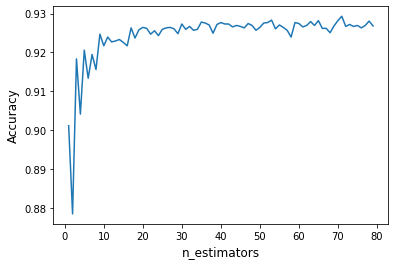

In [128]:
rfc_plot = sns.lineplot(x=estimators, y=rnd_accu)
rfc_plot.set_xlabel('n_estimators', fontsize=12)
rfc_plot.set_ylabel('Accuracy', fontsize=12)

# Analysis

## Which is the better classifier among the three?

Of the three clasifiers tested, we got results as follows:
* **K Nearest Neighbours Classifier** had **accuracy** score of $92.2\%$, **F-score** of $0.96$ and **AUC** score of $0.91$.
* **Decision Tree Classifier** had **accuracy** score of $92.3\%$, **F-score** of $0.96$ and **AUC** score of $0.91$.
* **Random Forest Classifier** had **accuracy** score of $92.7\%$, **F-score** of $0.96$ and **AUC** score of $0.9$.

Thus, **Random Forest Classifier** gave the best result in terms of accuracy.

## What could be the best possible values of the parameters for respective classifier based on the ROC curves?

Of the three classifiers tested, the optimal parameters were as follows:
* **K Nearest Neighbours Classifier :** $K=30$
* **Decision Tree Classifier :** Max depth $=7$
* **Random Forest Classifier :** Number of estimators $=50$

For all the three classifiers, optimal threshold was $T=4$

## If you have to choose only a subset of two features to predict earthquake, which ones would it be?

From the output decision tree of the **Decision Tree Classifier**, the two primary attributes to classify were **YEAR** and **LONGITUDE** out of the 4 features [YEAR, LATITUDE, LONGITUDE, DEPTH].

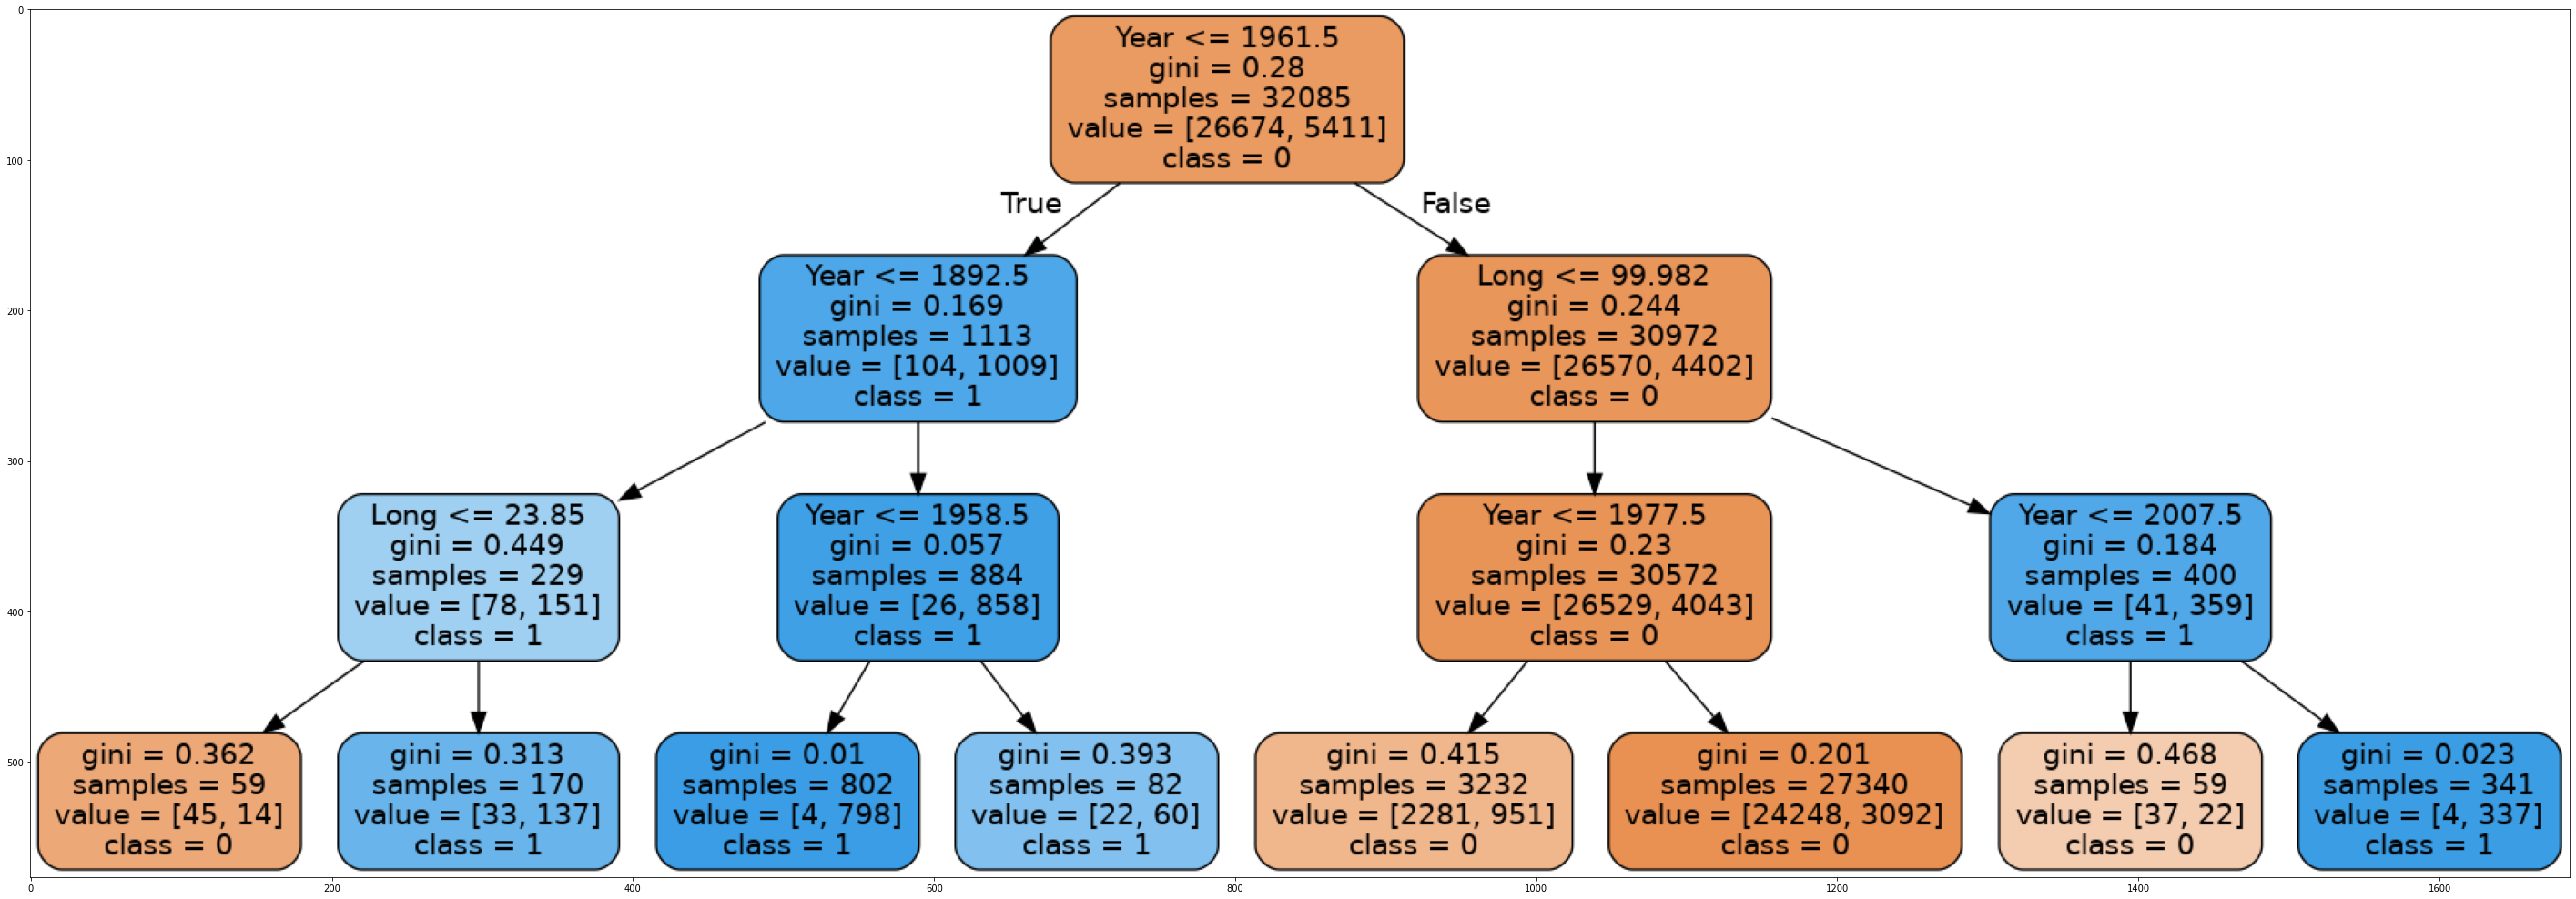

In [21]:
img = mpimg.imread('./tree_depth3.png')
plt.figure(figsize=(50,50))
imgplot = plt.imshow(img)
plt.show()

# Improving via feature processing

### Normalizing all features

In [83]:
df_five = dfpart.drop('YEAR', axis=1)
df_five = df_five.drop('target_labels', axis=1)
scaler = StandardScaler()
df_five = scaler.fit_transform(df_five)
df_five = normalize(df_five)
df_five = pd.DataFrame(df_five)
df_five

,0,1,2,3
0,0.985127,0.015471,-0.063909,-0.158750
1,0.985127,0.015471,-0.063909,-0.158750
2,0.986433,0.029816,-0.028160,-0.158960
3,0.801073,-0.485598,0.307640,0.166839
4,0.981546,0.005005,-0.018788,-0.190233
...,...,...,...,...
40102,-0.802553,-0.493378,0.247229,-0.226638
40103,-0.630419,-0.665489,0.367320,0.157392
40104,-0.411929,-0.801329,0.386654,-0.196682
40105,-0.238953,-0.839714,0.398057,-0.281658


### Reducing number of features to TWO using PCA

In [84]:
pca = PCA(n_components=2)
df_five = pca.fit_transform(df_five)
df_five = pd.DataFrame(df_five)
df_five.columns = ['P1', 'P2']
df_five

,P1,P2
0,0.057619,0.384454
1,0.057619,0.384454
2,0.061125,0.384451
3,0.758644,0.324125
4,0.070740,0.346794
...,...,...
40102,0.597781,-0.708782
40103,0.952286,-0.403881
40104,0.904351,-0.640870
40105,0.897649,-0.646448


 14%|█▍        | 1/7 [00:00<00:00,  6.24it/s]

2 0.9230865120917477 0.9331364690993461


 29%|██▊       | 2/7 [00:00<00:01,  3.77it/s]

7 0.9230865120917477 0.9562271310475674


 43%|████▎     | 3/7 [00:01<00:02,  1.91it/s]

20 0.9230865120917477 0.9577770247373772


 57%|█████▋    | 4/7 [00:02<00:02,  1.29it/s]

30 0.9230865120917477 0.9590152847287975


 71%|███████▏  | 5/7 [00:04<00:02,  1.16s/it]

40 0.9230865120917477 0.9589670790238626


 86%|████████▌ | 6/7 [00:06<00:01,  1.58s/it]

50 0.9230865120917477 0.9581615410611692


100%|██████████| 7/7 [00:08<00:00,  1.28s/it]

60 0.9230865120917477 0.9588116137744767


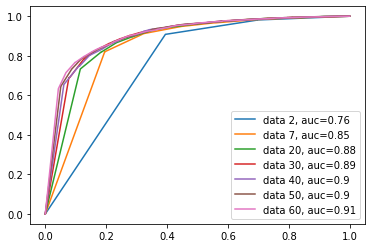

In [122]:
ests = [2,7,20,30,40,50,60]
est_five = []
rnd_accu_five = []
plt.figure(0).clf()
for est in tqdm(ests):#[2,7,20,30,40,50,60]
    rnd_five = RandomForestClassifier(n_estimators=est)
    rnd_five = rnd_five.fit(X_train, y_train)
    y_pred_rnd_five = rnd_five.predict(X_test)
    y_pred_proba = rnd_five.predict_proba(X_test)
    # print(y_pred_proba)
    # deps.append(dtc.get_depth())
    est_five.append(est)
    rnd_accu_five.append(accuracy_score(y_test, y_pred_rnd_five))
    # RocCurveDisplay.from_predictions(y_test, y_pred_rnd)
    print(est, accuracy_score(y_test, y_pred_rnd), f1_score(y_test, y_pred_rnd_five))

    fpr, tpr, thresh = roc_curve(y_test, [x[1] for x in y_pred_proba])
    auc = roc_auc_score(y_test, [x[1] for x in y_pred_proba])
    plt.plot(fpr,tpr,label="data "+str(est)+", auc="+str(round(auc,2)))

plt.legend(loc=0)

### Optimal number of estimators is $50$ with Accuracy $=87.0\%$, F-score $=0.73$ and AUC $=0.82$ at $T=5$

### Optimal number of estimators is $60$ with Accuracy $=92.3\%$, F-score $=0.96$ and AUC $=0.91$ at $T=4$


We notice a small improvement in accuracy on normalizing and performning a Principal Components Analysis on the data.

<AxesSubplot:>

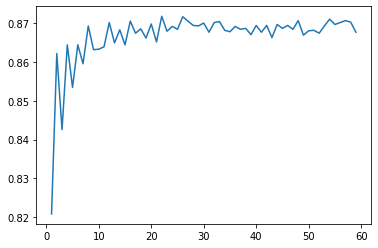

In [53]:
sns.lineplot(x=est_five, y=rnd_accu_five)